# Chapter 3. 파이썬을 이용한 데이터 분석

## 3.2 파이썬을 이용한 기술통계: 다변량 데이터

#### 다변량 데이터: 여러 개의 변수를 조합한 데이터  
 예: 구두 판매액과 구두 색의 조합    

### 3.2.1. 깔끔한 데이터(Tidy Data)
 - 분석하기 쉽게 정리한 표 형태의 데이터
 
| 물고기 종류 | 물고기 몸길이 |
| ----------- | ------------- |
| A           | 2             |
| A           | 3             |
| A           | 4             |
| B           | 7             |
| B           | 8             |
| B           | 9             |


 
 * 개별 값이 하나의 셀을 이룸
 * 개별 변수가 하나의 열을 이룸
 * 개별 관측이 하나의 행을 이룸
 * 개별 관측 유닛 유형이 하나의 표를 이룸
 
------------

### 3.2.2. 지저분한 데이터

(표안의 숫자: 물고기의 몸길이)

| A종 물고기 | B종 물고기 |
| ---------- | ---------- |
| 2          | 7          |
| 3          | 8          |
| 4          | 9          |


▷열 이름이 명시적으로 표시되지 않았기 때문에  
    물고기의 몸길이인지, 무게인지 알 수 없음

-----------------
### 3.2.3. 교차분석표

* 깔끔한 데이터

| 가게위치 | 구두색 | 구두가 팔린 수 |
| -------- | ------ | -------------- |
| 서울점   | 파랑   | 13             |
| 서울점   | 빨강   | 9              |
| 대구점   | 파랑   | 10             |
| 대구점   | 빨강   | 15             |


* 지저분한 데이터
 - 교차분석표(분할표)
 - 행이 변수의 의미를 갖는 경향이 있음: 행의 변수에 '가게 위치'라는 의미가 있음
 - 사람이 보기에는 좋으나, 데이터를 유지, 관리, 공개, 재사용하려는 목적으로는 좋지 않음
 
|          |        | 구두색 |      |
| -------- | ------ | ------ | ---- |
|          |        | 파랑   | 빨강 |
| 가게위치 | 서울점 | 13     | 15   |
|          | 대구점 | 10     | 15   |

-----------------

### 3.2.4. 다변량 데이터와 pandas 데이터 프레임

In [2]:
# 수치 계산에 사용하는 라이브러리
import pandas as pd
import scipy as sp
import numpy as np

# 표시 자릿수 지정
%precision 3

'%.3f'

In [3]:
fish_multi = pd.read_csv("3-2-1-fish_multi.csv")
print(fish_multi)

  species  length
0       A       2
1       A       3
2       A       4
3       B       6
4       B       8
5       B      10


### 3.2.5. 그룹별 통계량 계산하기

In [4]:
# 물고기 종류마다의 집계
group = fish_multi.groupby("species")
# 그룹별 평균
print(group.mean())

         length
species        
A             3
B             8


In [5]:
# 그룹별 표준편차
print(group.std(ddof = 1))

         length
species        
A           1.0
B           2.0


In [6]:
# 평균, 표준편차, 백분위값
group.describe()

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

### 3.2.6. 교차분석표 구현하기

가게위치, 색깔별 구두의 판매 데이터

In [8]:
shoes = pd.read_csv("3-2-2-shoes.csv")
print(shoes)

   store color  sales
0  tokyo  blue     10
1  tokyo   red     15
2  osaka  blue     13
3  osaka   red      9


In [10]:
cross = pd.pivot_table(
    data = shoes,         # 데이터를 지정
    values = "sales",     # 데이터를 모을 열 지정
    aggfunc = "sum",      # 데이터를 모을 함수 지정
    index = "store",      # 교차분석표의 행 지정
    columns = "color"     # 교차분석표의 열 지정
)
print(cross)

color  blue  red
store           
osaka    13    9
tokyo    10   15


### 3.2.9. 공분산

실수값을 지니는 2개의 확률변수 *X*와 *Y*에 대해서 공분산의 기댓값은 아래와 같이 나타낼 수 있다.

![E(X)=\mu ,E(Y)=\nu ](https://wikimedia.org/api/rest_v1/media/math/render/svg/a4f1d48eb9fb1282969b0fb60ee8d7088d954953)




공분산: 2개의 연속형 변수의 관계성을 확인하는 통계량
![{\displaystyle \operatorname {Cov} (X,Y)=\operatorname {E} \left((X-\mu )(Y-\nu )\right)\,}](https://wikimedia.org/api/rest_v1/media/math/render/svg/435d5740798f0ec6c3fdf5cf70c82fa78c2e0f77)

* 공분산이 0보다 클 때: 변수 한 쪽이 큰 값을 갖게 되면 다른 한 쪽도 커짐
* 공분산이 0보다 작을 때: 변수 한 쪽이 큰 값을 갖게되면 다른 한쪽은 작아짐
* 공분산이 0일 때: 변수 사이의 관계성이 없음

In [11]:
cov_data = pd.read_csv("3-2-3-cov.csv")
print(cov_data)

      x   y
0  18.5  34
1  18.7  39
2  19.1  41
3  19.7  38
4  21.5  45
5  21.7  41
6  21.8  52
7  22.0  44
8  23.4  44
9  23.8  49


In [12]:
# 데이터 분리
x = cov_data["x"]
y = cov_data["y"]

# 표본 크기
N = len(cov_data)

# 평균 계산
mu_x = np.mean(x)
mu_y = np.mean(y)

In [32]:
# 표본 공분산
cov_sample = sum((x - mu_x) * (y - mu_y)) / N
cov_sample

6.906

In [33]:
# 공분산
cov = sum((x - mu_x) * (y - mu_y)) / (N - 1)
cov

7.673

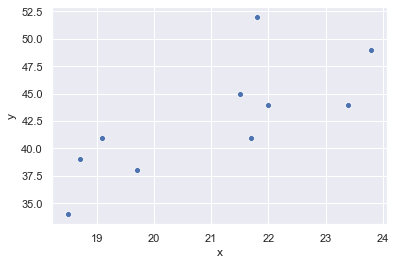

In [15]:
# import seaborn as sns; sns.set()
# import matplotlib.pyplot as plt
# ax = sns.scatterplot(x=x, y=y, data=cov_data)

### 3.2.10. 분산-공분산 행렬(실습)

In [37]:
# 표본 공분산
np.cov(x, y, ddof = 0)

array([[ 3.282,  6.906],
       [ 6.906, 25.21 ]])

In [39]:
# 공분산(ddof=1)
np.cov(x, y, ddof = 1)

array([[ 3.646,  7.673],
       [ 7.673, 28.011]])

### 3.2.11. 피어슨 상관계수
* 피어슨 상관계수: 공분산을 최대값 1, 최소값 -1 사이가 되도록 표준화 하는 것
* 공분산의 값(양수/음수/0)으로 두 변수간 얼마나 연관관계가 있는지 알기 어렵기 때문에 상관계수를 사용
 

In [43]:
# 분산 계산
sigma_2_x = np.var(x, ddof = 1)
sigma_2_y = np.var(y, ddof = 1)

# 상관계수
rho = cov / np.sqrt(sigma_2_x * sigma_2_y)
rho

0.7592719041137088

In [45]:
# 분산 계산
sigma_2_x_sample = np.var(x, ddof = 0)
sigma_2_y_sample = np.var(y, ddof = 0)

# 상관계수
cov_sample / np.sqrt(sigma_2_x_sample * sigma_2_y_sample)

0.7592719041137087

In [47]:
# 상관행렬
np.corrcoef(x, y)

array([[1.   , 0.759],
       [0.759, 1.   ]])

### 3.2.14. 상관계수가 무의미 할 때

 * 상관계수가 0에 가까운 값을 갖는 경우, 상관계수가 무의미함
 * 실제 그래프를 그려서 관계를 확인해야함


# [정리]

"3-2-3-cov.csv"데이터를 읽어서 각 변수간의 상관관계를 파악해보기

In [17]:
# 1. 데이터 읽어들이기
cov_data = pd.read_csv("3-2-3-cov.csv")

In [18]:
# 2. 데이터 출력하기

In [22]:
# 공분산: 두 변수의 관계성 확인
# 3. 공분산 구하기

In [2]:
# (피어슨) 상관계수: 공분산을 -1~1 사이의 값으로 표준화
# 4. (피어슨)상관계수 구하기